# Import

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller


# Import the bt package so we can use the backtesting functions
import bt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Theory Cointegration

## Stationarity

In [2]:
def generate_data(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

<ipython-input-3-61ca6280aa4c>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index=range(T))
<ipython-input-3-61ca6280aa4c>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index=range(T))


Text(0.5, 1.0, 'Non-Stationary')

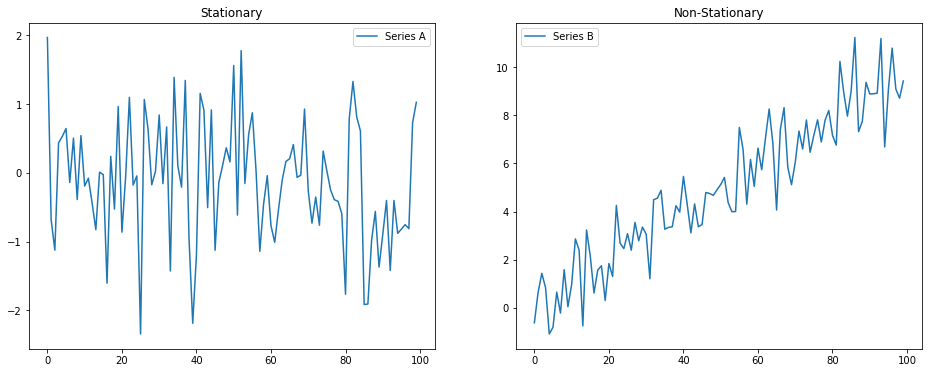

In [3]:
# Stationarity is important in time series analysis


# Set the parameters and the number of datapoints
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_data(params)

T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent( time )
    # mean of the series changes over time
    params = (t * 0.1, 1)
    B[t] = generate_data(params)
    
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols =2, figsize=(16,6))

ax1.plot(A)
ax2.plot(B)
ax1.legend(['Series A'])
ax2.legend(['Series B'])
ax1.set_title('Stationary')
ax2.set_title('Non-Stationary')

In [4]:
def stationarity_test(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')

In [5]:
stationarity_test(A)
stationarity_test(B)

p-value = 9.939269671195542e-16 The series A is likely stationary.
p-value = 0.7764305793707402 The series B is likely non-stationary.


## Cointegration

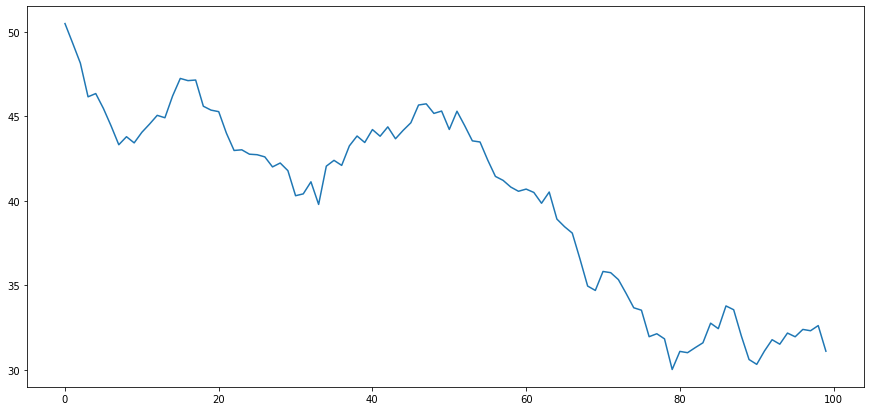

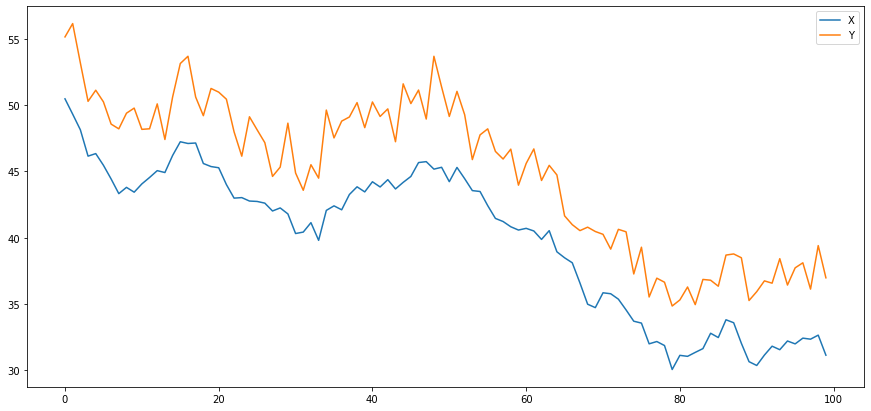

In [6]:
 #Cointegration is NOT equal correlation !



# Generate daily returns

Xreturns = np.random.normal(0, 1, 100)

# sum up and shift the prices up

X = pd.Series(np.cumsum(
    Xreturns), name='X') + 50
X.plot(figsize=(15,7))

noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'

pd.concat([X, Y], axis=1).plot(figsize=(15, 7))

plt.show()

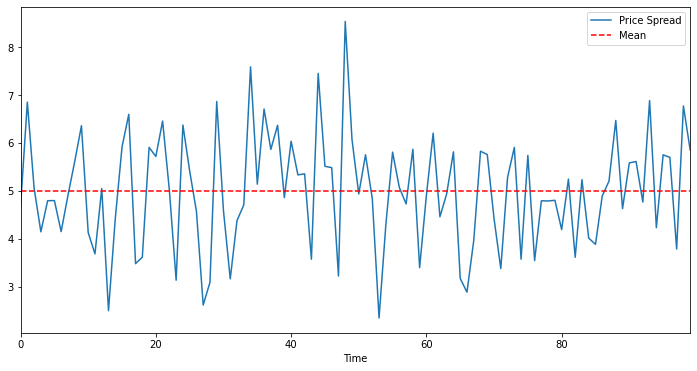

In [7]:
plt.figure(figsize=(12,6))
(Y - X).plot() # Plot the spread
plt.axhline((Y - X).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.xlim(0,99)
plt.legend(['Price Spread', 'Mean']);

### Test

In [8]:
score, pvalue, _ = coint(X,Y)
print(pvalue)

# Low pvalue means high cointegration!

2.5810392223922017e-15


### Cointegration VS Correlation Exemple

(0.0, 99.0)

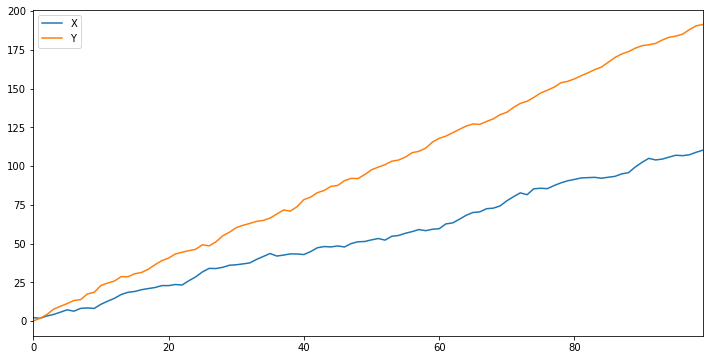

In [9]:
X_returns = np.random.normal(1, 1, 100)
Y_returns = np.random.normal(2, 1, 100)

X_diverging = pd.Series(np.cumsum(X_returns), name='X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name='Y')


pd.concat([X_diverging, Y_diverging], axis=1).plot(figsize=(12,6));
plt.xlim(0, 99)

In [10]:
print('Correlation: ' + str(X_diverging.corr(Y_diverging)))
score, pvalue, _ = coint(X_diverging,Y_diverging)
print('Cointegration test p-value: ' + str(pvalue))


Correlation: 0.9962675680664862
Cointegration test p-value: 0.24735959692494025


# Paired Stock

## Import

In [11]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime

import yfinance as yf
yf.pdr_override()

## Date & Tickers

In [12]:
start = datetime.datetime(2013, 6, 1)
end = datetime.datetime(2021, 6, 1)

#tickers = ['CVX','BP','RDS-A','PBR','EOG','XOM']
#tickers = ['BP','PBR'] # GAZ COMPANY GOOD
#tickers = ['C','BAC','JPM','WFC','GS','MS']
#tickers = ['C','GS'] # BANK COMPANY GOOD 
#tickers = ['TSLA','GM'] # CAR COMPANY GOOD
#tickers = ['MSFT','ABDE'] # SOFWTARE COMPANY GOOD 
tickers = ['ORCL','AAPL', 'ADBE', 'FB','AMZN' , 'QCOM', 'JNPR', 'AMD', 'IBM','ebay','INTC']
#'aapl','amzn','KO','PEP','TM','VWAGY','MS','XOM'

df = pdr.get_data_yahoo(tickers, start, end)['Close']
df.tail()

[*********************100%***********************]  11 of 11 completed


,AAPL,ADBE,AMD,AMZN,EBAY,FB,IBM,INTC,JNPR,ORCL,QCOM
Date,,,,,,,,,,,
2021-05-24,127.099998,497.829987,77.440002,3244.989990,60.970001,324.630005,144.720001,56.959999,26.84,79.379997,132.910004
2021-05-25,126.900002,505.079987,77.860001,3259.050049,61.299999,327.790009,143.789993,56.869999,26.58,78.830002,133.750000
2021-05-26,126.849998,506.980011,78.339996,3265.159912,61.439999,327.660004,143.380005,56.919998,26.57,79.260002,133.089996
2021-05-27,125.279999,498.279999,78.419998,3230.110107,59.509998,332.750000,143.820007,57.730000,26.58,78.980003,133.639999
2021-05-28,124.610001,504.579987,80.080002,3223.070068,60.880001,328.730011,143.740005,57.119999,26.33,78.739998,134.539993


## Cointegration

### Formula

In [13]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

### Heatmap Paired Stocks

[('ADBE', 'AMZN'), ('EBAY', 'FB'), ('EBAY', 'ORCL'), ('IBM', 'INTC'), ('IBM', 'ORCL'), ('JNPR', 'ORCL'), ('JNPR', 'QCOM')]


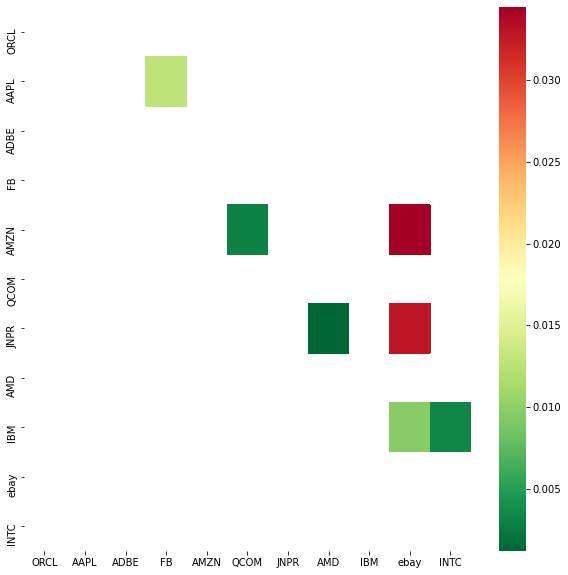

In [14]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(df)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

### P-value verification

In [15]:
S1 = df['EBAY']
S2 = df['FB']

score, pvalue, _ = coint(S1, S2)
pvalue

0.0030518150409532497

In [16]:
S3 = df['IBM']
S4 = df['INTC']

score, pvalue, _ = coint(S3, S4)
pvalue

0.0012035593825795007

In [17]:
S5 = df['ADBE']
S6 = df['AMZN']

score, pvalue, _ = coint(S3, S5)
pvalue

0.014248807166975281

In [18]:
S7 = df['JNPR']
S8 = df['QCOM']

score, pvalue, _ = coint(S6, S4)
pvalue

0.35417941451568374

### Spread

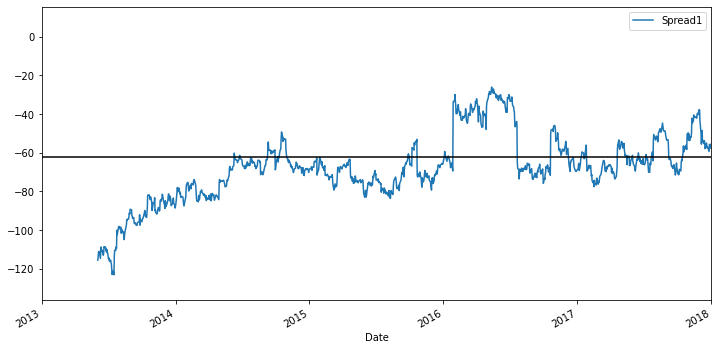

In [19]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['EBAY']
b = results.params['EBAY']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread1']);

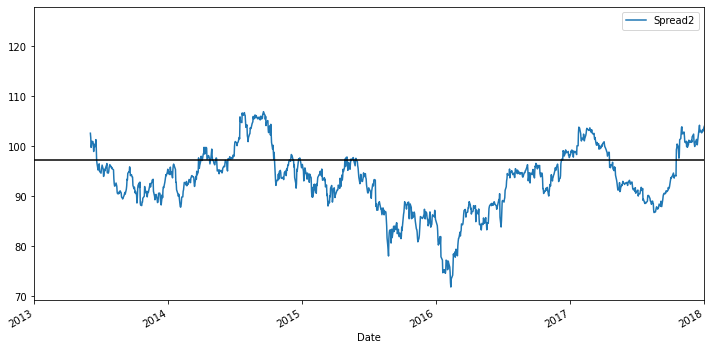

In [20]:
S3 = sm.add_constant(S3)
results = sm.OLS(S4, S3).fit()
S3 = S3['IBM']
b = results.params['IBM']

spread = S4 - b * S3
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread2']);


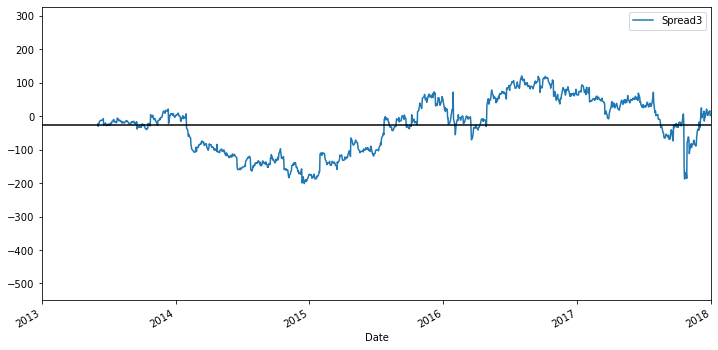

In [21]:
S5 = sm.add_constant(S5)
results = sm.OLS(S6, S5).fit()
S5 = S5['ADBE']
b = results.params['ADBE']

spread = S6 - b * S5
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread3']);

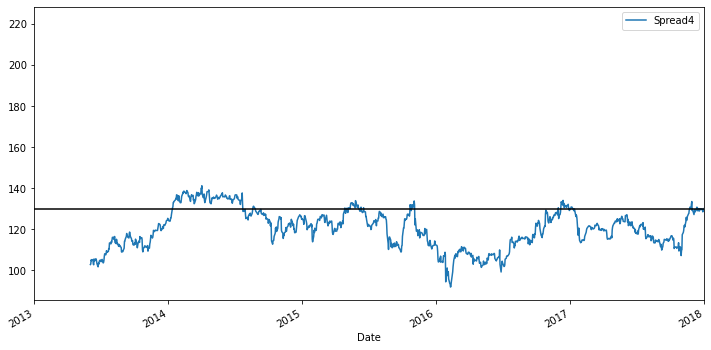

In [22]:
S7 = sm.add_constant(S7)
results = sm.OLS(S8, S7).fit()
S7 = S7['JNPR']
b = results.params['JNPR']

spread = S8 - b * S7
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread4']);

### Price Ratio

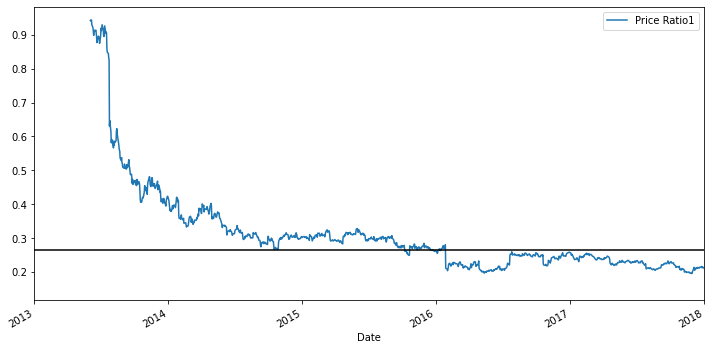

In [23]:
ratio1 = S1/S2
ratio1.plot(figsize=(12,6))
plt.axhline(ratio1.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio1']);

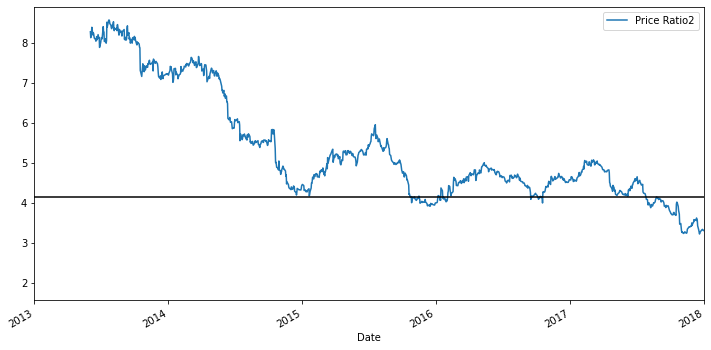

In [24]:
ratio2 = S3/S4
ratio2.plot(figsize=(12,6))
plt.axhline(ratio2.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio2']);

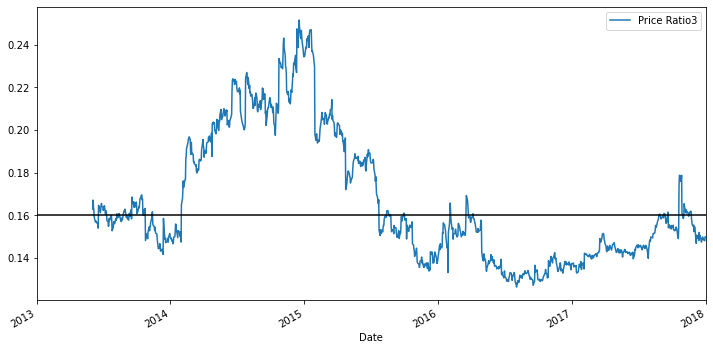

In [25]:
ratio3 = S5/S6
ratio3.plot(figsize=(12,6))
plt.axhline(ratio3.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio3']);

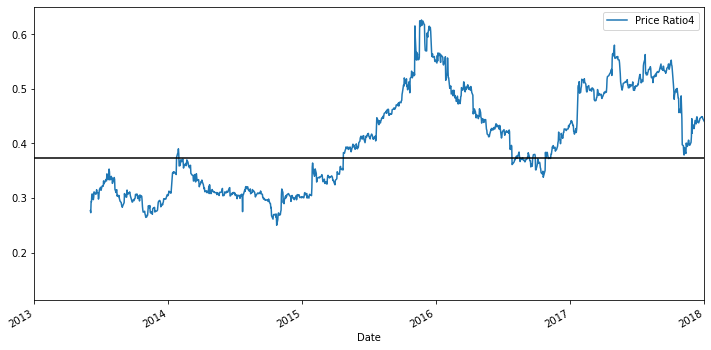

In [26]:
ratio4 = S7/S8
ratio4.plot(figsize=(12,6))
plt.axhline(ratio4.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio4']);

### price ratio + z-score

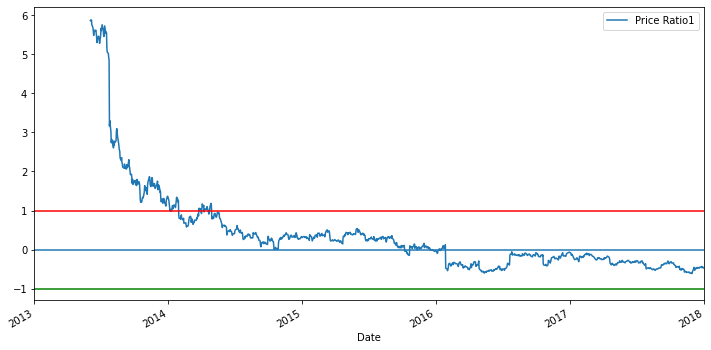

In [27]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio1).plot(figsize=(12,6))
plt.axhline(zscore(ratio1).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio1'])
plt.show()

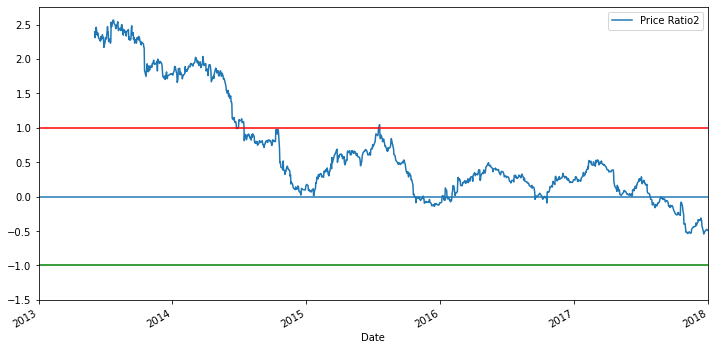

In [28]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio2).plot(figsize=(12,6))
plt.axhline(zscore(ratio2).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio2'])
plt.show()


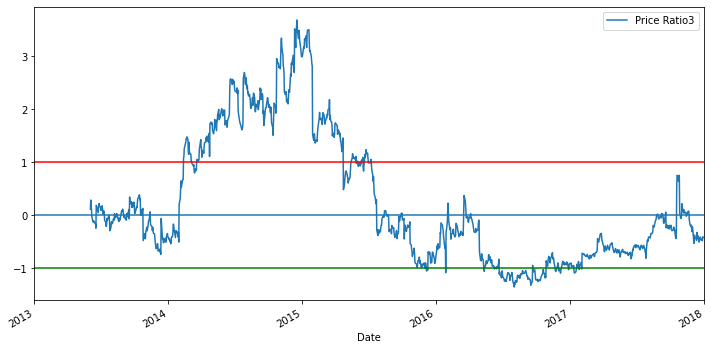

In [29]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio3).plot(figsize=(12,6))
plt.axhline(zscore(ratio3).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio3'])
plt.show()

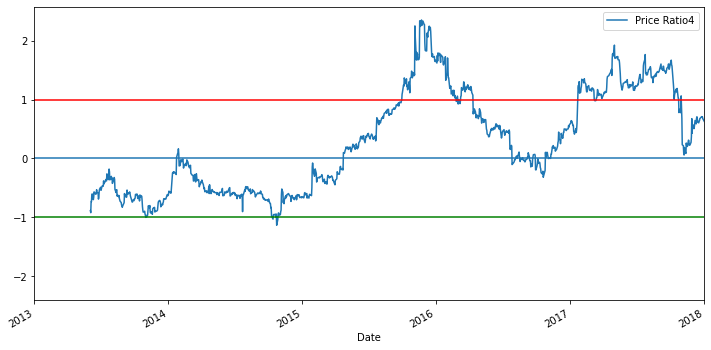

In [30]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio4).plot(figsize=(12,6))
plt.axhline(zscore(ratio4).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio4'])
plt.show()

# Financial Trading

## Price Ticker & Dates

In [31]:
#define the ticker symbol
tickerSymbol1 = 'EBAY'
tickerSymbol2 = 'FB'
tickerSymbol3 = 'IBM'
tickerSymbol4 = 'INTC'
tickerSymbol5 = 'ADBE'
tickerSymbol6 = 'AMZN'
tickerSymbol7 = 'JNPR'
tickerSymbol8 = 'QCOM'

#get data on this ticker
tickerData1 = yf.Ticker(tickerSymbol1)
tickerData2 = yf.Ticker(tickerSymbol2)
tickerData3 = yf.Ticker(tickerSymbol3)
tickerData4 = yf.Ticker(tickerSymbol4)
tickerData5 = yf.Ticker(tickerSymbol5)
tickerData6 = yf.Ticker(tickerSymbol6)
tickerData7 = yf.Ticker(tickerSymbol7)
tickerData8 = yf.Ticker(tickerSymbol8)

#get the historical prices for this ticker
EBAY = tickerData1.history(period='1d', start='2017-3-3', end='2018-3-4')
FB = tickerData2.history(period='1d', start='2017-3-3', end='2018-3-4')
IBM = tickerData3.history(period='1d', start='2017-3-3', end='2018-3-4')
INTC = tickerData4.history(period='1d', start='2017-3-3', end='2018-3-4')
ADBE = tickerData5.history(period='1d', start='2017-3-3', end='2018-3-4')
AMZN = tickerData6.history(period='1d', start='2017-3-3', end='2018-3-4')
JNPR = tickerData7.history(period='1d', start='2017-3-3', end='2018-3-4')
QCOM = tickerData8.history(period='1d', start='2017-3-3', end='2018-3-4')


EBAYp = [EBAY["Close"]]
FBp =  [FB["Close"]]
IBMp = [IBM["Close"]]
INTCp = [INTC["Close"]]
ADBEp = [ADBE["Close"]]
AMZNp = [AMZN["Close"]]
JNPRp = [JNPR["Close"]]
QCOMp = [QCOM["Close"]]


## Signal

### Tickers & Dates

In [32]:

data = bt.get('EBAY,FB', start='2017-3-4', end='2018-3-4')
data2 = bt.get('IBM,INTC', start='2017-3-4', end='2018-3-4')
data3 = bt.get('ADBE,AMZN', start='2017-3-4', end='2018-3-4')
data4 = bt.get('JNPR,QCOM', start='2017-3-4', end='2018-3-4')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Formula

In [33]:
P1t = np.asarray([np.asarray(EBAYp)])
P2t = np.asarray([np.asarray(FBp)])
P3t = np.asarray([np.asarray(IBMp)])
P4t = np.asarray([np.asarray(INTCp)])
P5t = np.asarray([np.asarray(ADBEp)])
P6t = np.asarray([np.asarray(AMZNp)])
P7t = np.asarray([np.asarray(JNPRp)])
P8t = np.asarray([np.asarray(QCOMp)])
# strategy 1
Rt = (P1t)/(P2t)
# strategy 2
Rt2 = (P3t)/(P4t)
# strategy 3
Rt3 = (P5t)/(P6t)
# strategy 4
Rt4 = (P7t)/(P8t)

### Vector Creation (Signal)

In [34]:
### Empty Vector 

#Only to generate a list

# strategy 1
short = 50
sma_short = data.rolling(short).mean()

# strategy 2
short2 = 50
sma_short2 = data2.rolling(short2).mean()

# strategy 3
short3 = 50
sma_short3 = data3.rolling(short3).mean()

# strategy 4
short4 = 50
sma_short4 = data4.rolling(short4).mean()



In [35]:
# Create a vector  for strategy 1 

Rt = (P1t)/(P2t)
#Rt1 = (P1t1)/(P2t1)
Rt = Rt[0][0]

#Signal = (Rt) - (Rt1)
Signal = []
for i in range(len(Rt)):
    if i != 0:
        Signal.append(Rt[i]-Rt[i-1])

#print(Signal)

signalF = sma_short.copy()
signalF
signal1 = np.array(Signal)

signalF['signal1'] = signal1.tolist()
#signalF.drop('aapl')
#print(signalF)


In [36]:
# Create a vector  for stragy 2 

Rt2 = (P3t)/(P4t)
Rt2 = Rt2[0][0]

#Signal = (Rt) - (Rt1)
SignalB = []
for i in range(len(Rt2)):
    if i != 0:
        SignalB.append(Rt2[i]-Rt2[i-1])

#print(SignalB)

signalF2 = sma_short2.copy()
signalF2
signal2 = np.array(SignalB)

signalF2['signal2'] = signal2.tolist()
#signalF.drop('aapl')
#print(signalF2)

  
    
    
    

In [37]:
# Create a vector  for stragy 3

Rt3 = (P5t)/(P6t)
Rt3 = Rt3[0][0]

# Create a loop to substract t-1 to t1 and create the signal
SignalC = []
for i in range(len(Rt3)):
    if i != 0:
        SignalC.append(Rt3[i]-Rt3[i-1])

#print(SignalC)

signalF3 = sma_short3.copy()
signalF3
signal3 = np.array(SignalC)

signalF3['signal3'] = signal3.tolist()

#print(signalF3)

In [38]:
# Create a vector  for stragy 4 

Rt4 = (P7t)/(P8t)
Rt4 = Rt4[0][0]

#Create a loop to substract t-1 to t1 and create the sign
SignalD = []
for i in range(len(Rt4)):
    if i != 0:
        SignalD.append(Rt4[i]-Rt4[i-1])

#print(SignalD)

signalF4 = sma_short4.copy()
signalF4
signal4 = np.array(SignalD)

signalF4['signal4'] = signal4.tolist()

#print(signalF4)

### Target Weights (Based on Signal)

In [39]:
 #weight the portfolio based on the signal.
    
    
#strategy 1
target_weights = signalF

# set appropriate target weights
target_weights[signalF["signal1"] > 0] =  0.5
target_weights[signalF["signal1"] <= 0] = -0.5
#print(target_weights)

 #strategy 2
target_weights2 = signalF2
# set appropriate target weights
target_weights2[signalF2["signal2"] > 0] =  0.5
target_weights2[signalF2["signal2"] <= 0] = -0.5
#print(target_weights2)

 #strategy 3
target_weights3 = signalF3
# set appropriate target weights
target_weights3[signalF3["signal3"] > 0] =  0.5
target_weights3[signalF3["signal3"] <= 0] = -0.5
#print(target_weights3)

 #strategy 4
target_weights4 = signalF4
# set appropriate target weights
target_weights4[signalF4["signal4"] > 0] =  0.5
target_weights4[signalF4["signal4"] <= 0] = -0.5
#print(target_weights4)

In [40]:
# Adjust the column to make sure paired will be buy and sell based on the signal : if signal is positif => sell first column and buy the second


#strategy 1
target_weights["ebay"] = target_weights["ebay"] * (-1)

#strategy 2
target_weights2["ibm"] = target_weights2["ibm"] * (-1)

#strategy 3
target_weights3["adbe"] = target_weights3["adbe"] * (-1)

#strategy 4
target_weights4["jnpr"] = target_weights4["jnpr"] * (-1)
#target_weights = target_weights.drop("signal1")
#target_weigths = target_weights.drop(columns = "signal1")
#print(target_weights)
#print(target_weights2)
#print(target_weights3)
#print(target_weights4)


In [41]:
#remove signal to use it as target_weight for our strategies

#strategy 1
target_weightsA = target_weights.drop(columns = "signal1")
target_weightsA2 = target_weights2.drop(columns = "signal2")
target_weightsA3 = target_weights3.drop(columns = "signal3")
target_weightsA4 = target_weights4.drop(columns = "signal4")

print(target_weightsA)
print(target_weightsA2)
print(target_weightsA3)
print(target_weightsA4)


            ebay   fb
Date                 
2017-03-06   0.5 -0.5
2017-03-07   0.5 -0.5
2017-03-08   0.5 -0.5
2017-03-09   0.5 -0.5
2017-03-10   0.5 -0.5
...          ...  ...
2018-02-26   0.5 -0.5
2018-02-27  -0.5  0.5
2018-02-28  -0.5  0.5
2018-03-01   0.5 -0.5
2018-03-02  -0.5  0.5

[251 rows x 2 columns]
            ibm  intc
Date                 
2017-03-06 -0.5   0.5
2017-03-07  0.5  -0.5
2017-03-08  0.5  -0.5
2017-03-09  0.5  -0.5
2017-03-10 -0.5   0.5
...         ...   ...
2018-02-26  0.5  -0.5
2018-02-27  0.5  -0.5
2018-02-28 -0.5   0.5
2018-03-01 -0.5   0.5
2018-03-02  0.5  -0.5

[251 rows x 2 columns]
            adbe  amzn
Date                  
2017-03-06  -0.5   0.5
2017-03-07   0.5  -0.5
2017-03-08   0.5  -0.5
2017-03-09   0.5  -0.5
2017-03-10  -0.5   0.5
...          ...   ...
2018-02-26   0.5  -0.5
2018-02-27   0.5  -0.5
2018-02-28  -0.5   0.5
2018-03-01   0.5  -0.5
2018-03-02  -0.5   0.5

[251 rows x 2 columns]
            jnpr  qcom
Date                  
2017-03-06 

## Strategies 

Stat                 ST1
-------------------  ----------
Start                2017-03-05
End                  2018-03-02
Risk-free rate       0.00%

Total Return         0.16%
Daily Sharpe         0.07
Daily Sortino        0.10
CAGR                 0.16%
Max Drawdown         -8.34%
Calmar Ratio         0.02

MTD                  0.63%
3m                   -0.49%
6m                   4.12%
YTD                  -0.94%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  0.16%

Daily Sharpe         0.07
Daily Sortino        0.10
Daily Mean (ann.)    0.85%
Daily Vol (ann.)     11.70%
Daily Skew           -1.65
Daily Kurt           11.18
Best Day             2.63%
Worst Day            -5.25%

Monthly Sharpe       0.19
Monthly Sortino      0.31
Monthly Mean (ann.)  1.67%
Monthly Vol (ann.)   8.90%
Monthly Skew         -0.42
Monthly Kurt         -1.09
Best Month           3.65%
Worst Month          -3.77%

Yearly Sharpe        -
Year

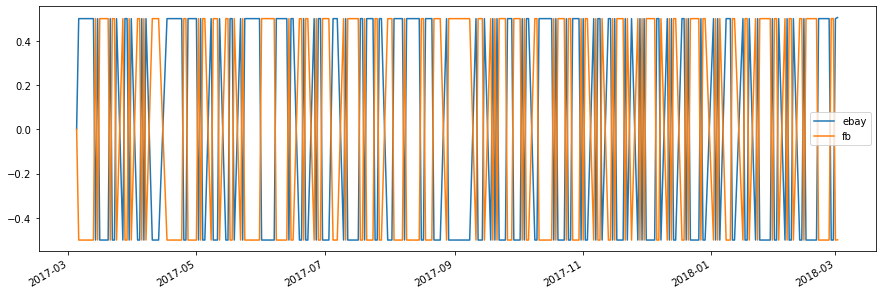

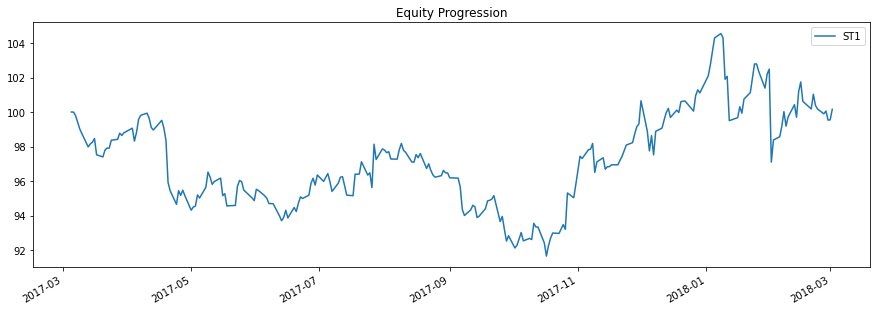

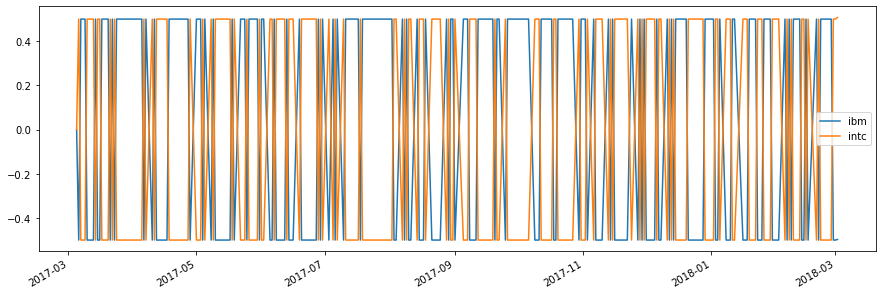

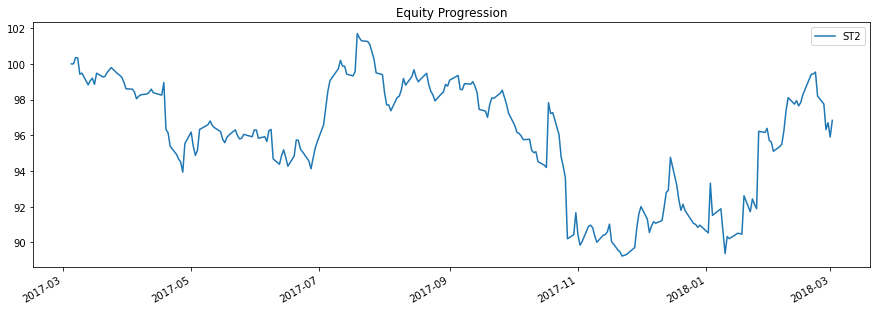

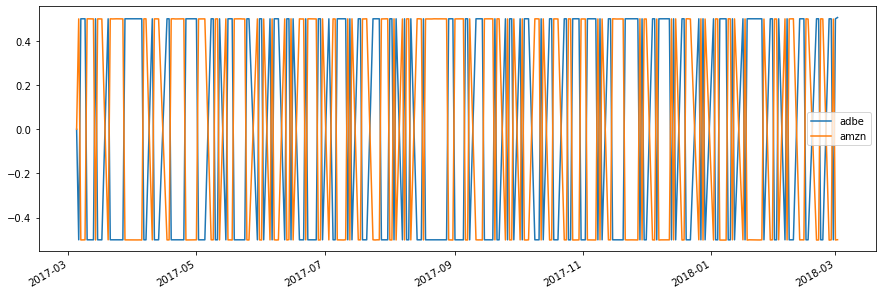

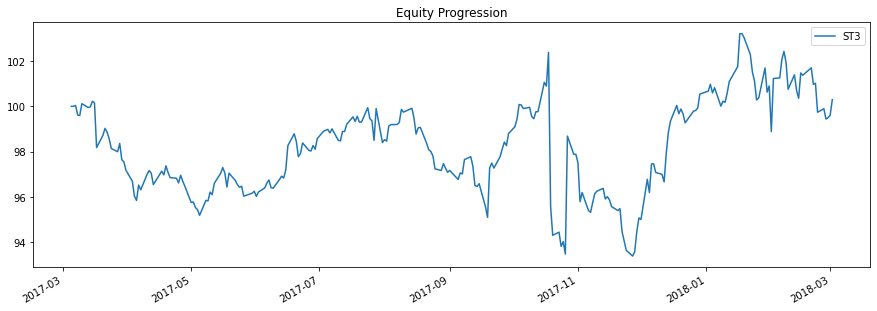

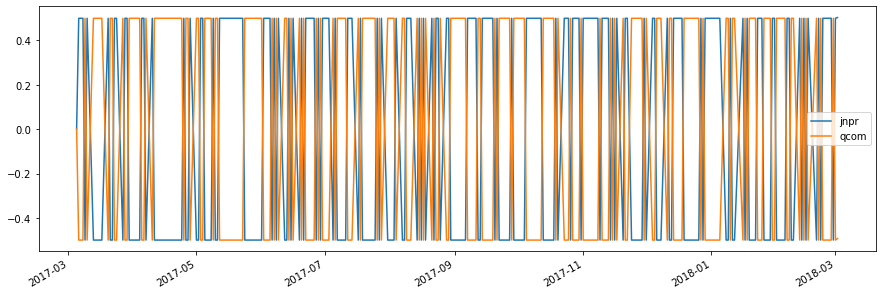

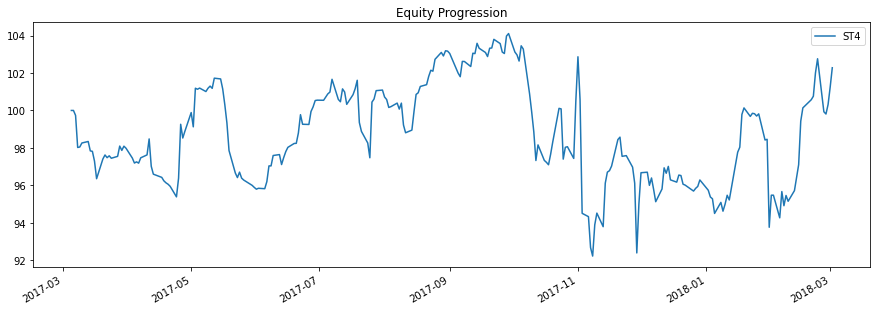

In [42]:
# Create strategies for each paired stocks


#Strategies
ST1 = bt.Strategy('ST1', [bt.algos.RunDaily(),
                              bt.algos.SelectAll(include_no_data=True),
                              bt.algos.WeighTarget(target_weightsA),
                              bt.algos.Rebalance()],
                    ['ebay', 'fb'])

ST2 = bt.Strategy('ST2', [bt.algos.RunDaily(),
                              bt.algos.SelectAll(include_no_data=True),
                              bt.algos.WeighTarget(target_weightsA2),
                              bt.algos.Rebalance()],
                    ['ibm', 'intc'])

ST3 = bt.Strategy('ST3', [bt.algos.RunDaily(),
                              bt.algos.SelectAll(include_no_data=True),
                              bt.algos.WeighTarget(target_weightsA3),
                              bt.algos.Rebalance()],
                    ['adbe', 'amzn'])
ST4 = bt.Strategy('ST4', [bt.algos.RunDaily(),
                              bt.algos.SelectAll(include_no_data=True),
                              bt.algos.WeighTarget(target_weightsA4),
                              bt.algos.Rebalance()],
                    ['jnpr', 'qcom'])

#test strategies
TST1 = bt.Backtest(ST1, data)
TST2 = bt.Backtest(ST2, data2)
TST3 = bt.Backtest(ST3, data3)
TST4 = bt.Backtest(ST4, data4)

#RES STRATEGIES
res_ST1 = bt.run(TST1)
res_ST2 = bt.run(TST2)
res_ST3 = bt.run(TST3)
res_ST4 = bt.run(TST4)

# plot security weights to test logic
res_ST1.plot_security_weights()
res_ST1.plot()
res_ST1.display()

res_ST2.plot_security_weights()
res_ST2.plot()
res_ST2.display()

res_ST3.plot_security_weights()
res_ST3.plot()
res_ST3.display()

res_ST4.plot_security_weights()
res_ST4.plot()
res_ST4.display()




Stat                 Benchmark1
-------------------  ------------
Start                2017-03-05
End                  2018-03-02
Risk-free rate       0.00%

Total Return         28.94%
Daily Sharpe         1.41
Daily Sortino        2.37
CAGR                 29.24%
Max Drawdown         -11.15%
Calmar Ratio         2.62

MTD                  -0.37%
3m                   11.30%
6m                   10.65%
YTD                  7.01%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  29.24%

Daily Sharpe         1.41
Daily Sortino        2.37
Daily Mean (ann.)    27.40%
Daily Vol (ann.)     19.40%
Daily Skew           0.64
Daily Kurt           9.97
Best Day             8.57%
Worst Day            -4.55%

Monthly Sharpe       2.23
Monthly Sortino      5.19
Monthly Mean (ann.)  24.64%
Monthly Vol (ann.)   11.03%
Monthly Skew         -0.29
Monthly Kurt         1.22
Best Month           7.17%
Worst Month          -4.76%

Yearly Sharpe

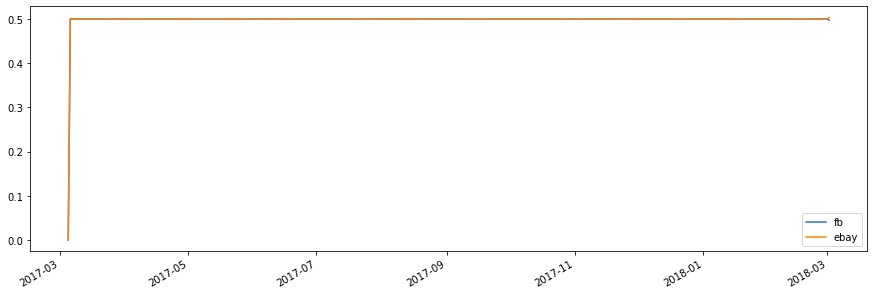

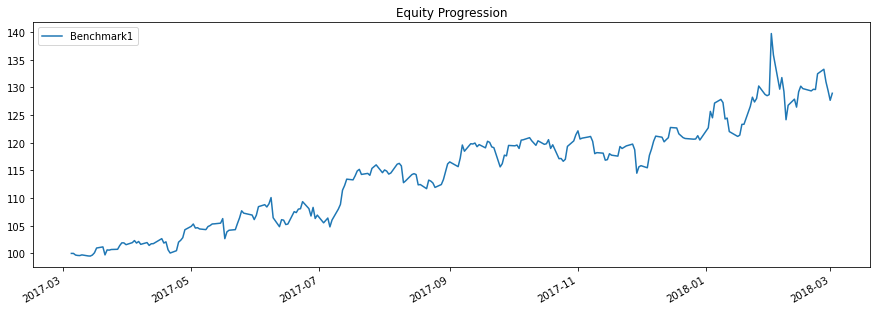

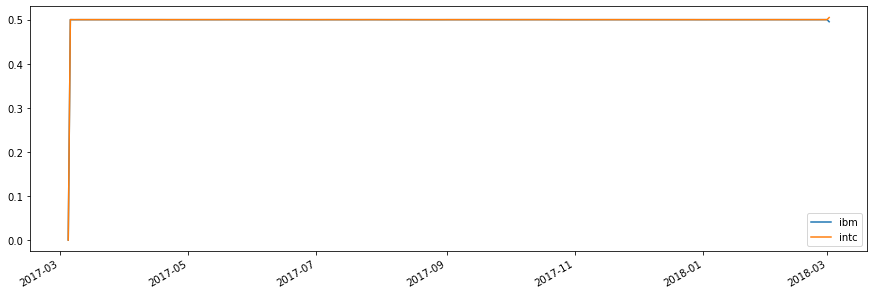

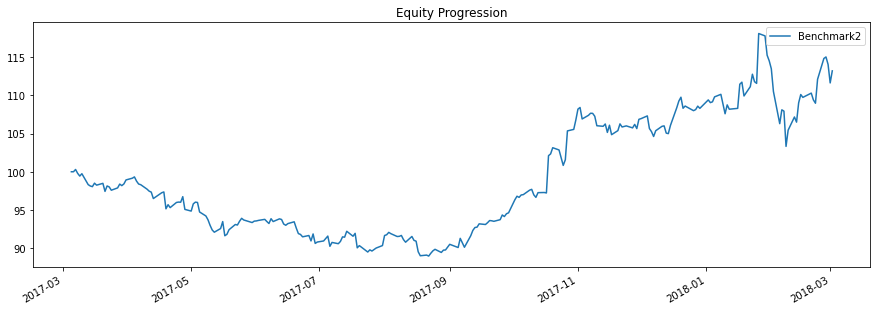

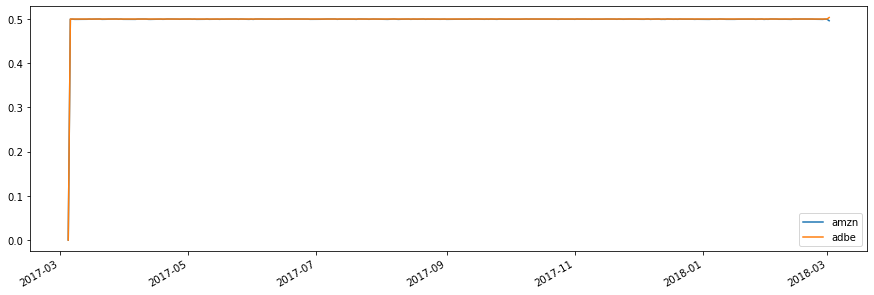

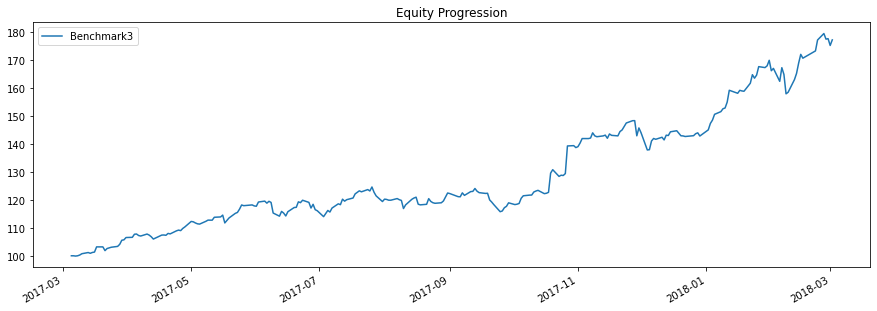

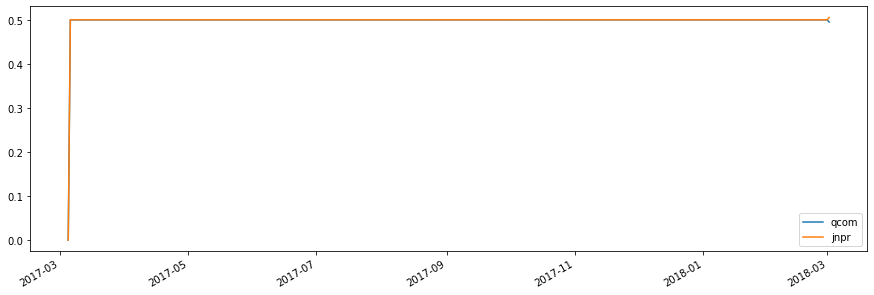

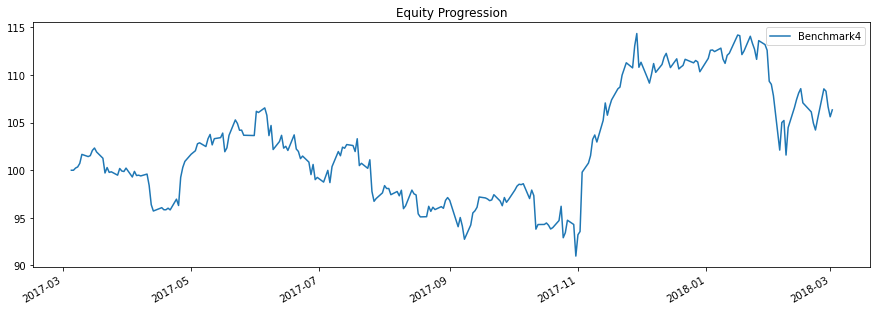

In [43]:
#create a benchmark for the paired stocks


Benchmark1 = bt.Strategy('Benchmark1',[bt.algos.RunDaily(),
                            bt.algos.SelectAll(),         
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()],
                         ['ebay', 'fb'])

Benchmark2 = bt.Strategy('Benchmark2',[bt.algos.RunDaily(),
                            bt.algos.SelectAll(),         
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()],
                         ['ibm', 'intc'])

Benchmark3 = bt.Strategy('Benchmark3',[bt.algos.RunDaily(),
                            bt.algos.SelectAll(),         
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()],
                         ['adbe', 'amzn'])

Benchmark4 = bt.Strategy('Benchmark4',[bt.algos.RunDaily(),
                            bt.algos.SelectAll(),         
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()],
                         ['jnpr', 'qcom'])
#test strategies
TBenchmark1 = bt.Backtest(Benchmark1, data)
TBenchmark2 = bt.Backtest(Benchmark2, data2)
TBenchmark3 = bt.Backtest(Benchmark3, data3)
TBenchmark4 = bt.Backtest(Benchmark4, data4)

#RES STRATEGIES
res_Benchmark1 = bt.run(TBenchmark1)
res_Benchmark2 = bt.run(TBenchmark2)
res_Benchmark3 = bt.run(TBenchmark3)
res_Benchmark4 = bt.run(TBenchmark4)

# plot security weights to test logic
res_Benchmark1.plot_security_weights()
res_Benchmark1.plot()
res_Benchmark1.display()

res_Benchmark2.plot_security_weights()
res_Benchmark2.plot()
res_Benchmark2.display()

res_Benchmark3.plot_security_weights()
res_Benchmark3.plot()
res_Benchmark3.display()

res_Benchmark4.plot_security_weights()
res_Benchmark4.plot()
res_Benchmark4.display()



        

## Master

### Ticker and Dates

In [44]:
dataPF = bt.get('EBAY,FB,IBM,INTC,ADBE,AMZN,JNPR,QCOM', start='2017-3-2', end='2018-3-2')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Master startegies and Benchmarks

Stat                 master
-------------------  ----------
Start                2017-03-01
End                  2018-03-01
Risk-free rate       0.00%

Total Return         16.46%
Daily Sharpe         1.69
Daily Sortino        2.78
CAGR                 16.47%
Max Drawdown         -5.93%
Calmar Ratio         2.78

MTD                  -0.95%
3m                   6.29%
6m                   14.16%
YTD                  5.22%
1Y                   16.46%
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  16.47%

Daily Sharpe         1.69
Daily Sortino        2.78
Daily Mean (ann.)    15.67%
Daily Vol (ann.)     9.29%
Daily Skew           -0.17
Daily Kurt           5.98
Best Day             2.80%
Worst Day            -2.80%

Monthly Sharpe       2.44
Monthly Sortino      14.31
Monthly Mean (ann.)  15.52%
Monthly Vol (ann.)   6.36%
Monthly Skew         1.05
Monthly Kurt         0.72
Best Month           5.34%
Worst Month          -0.95%

Yearly Sharpe    

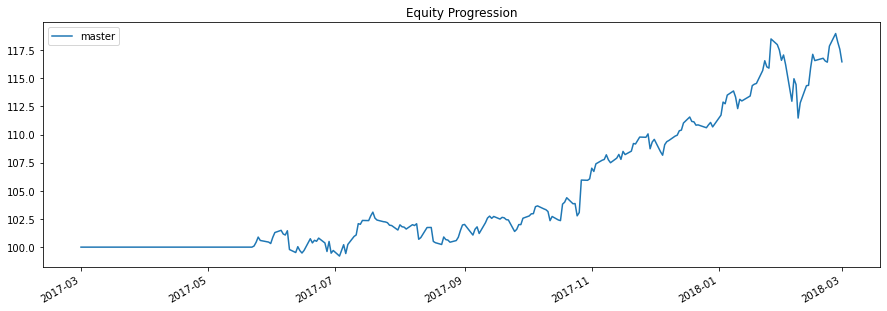

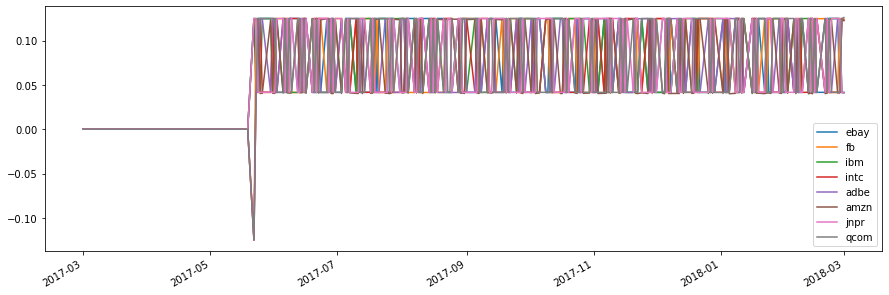

In [45]:
master = bt.Strategy('master', [bt.algos.RunDaily(),
                                bt.algos.SelectHasData(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [ST1,ST2,ST3,ST4])

# create the backtest and run it
testPF = bt.Backtest(master, dataPF)
# create results so we can display and plot
resultsPF = bt.run(testPF)

resultsPF.plot()
resultsPF.display()
resultsPF.plot_security_weights()

Stat                 masterB
-------------------  ----------
Start                2017-03-01
End                  2018-03-01
Risk-free rate       0.00%

Total Return         28.14%
Daily Sharpe         1.86
Daily Sortino        3.01
CAGR                 28.16%
Max Drawdown         -8.33%
Calmar Ratio         3.38

MTD                  -1.45%
3m                   7.62%
6m                   21.22%
YTD                  6.64%
1Y                   28.14%
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  28.16%

Daily Sharpe         1.86
Daily Sortino        3.01
Daily Mean (ann.)    25.76%
Daily Vol (ann.)     13.82%
Daily Skew           -0.56
Daily Kurt           4.76
Best Day             3.66%
Worst Day            -4.10%

Monthly Sharpe       2.40
Monthly Sortino      10.32
Monthly Mean (ann.)  23.89%
Monthly Vol (ann.)   9.95%
Monthly Skew         0.71
Monthly Kurt         -0.17
Best Month           7.49%
Worst Month          -1.94%

Yearly Sharpe 

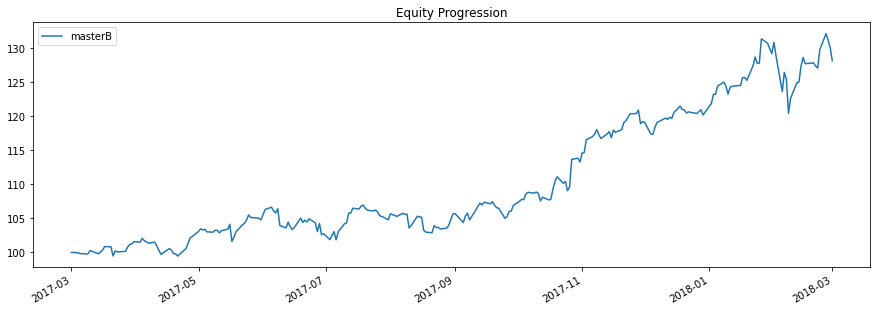

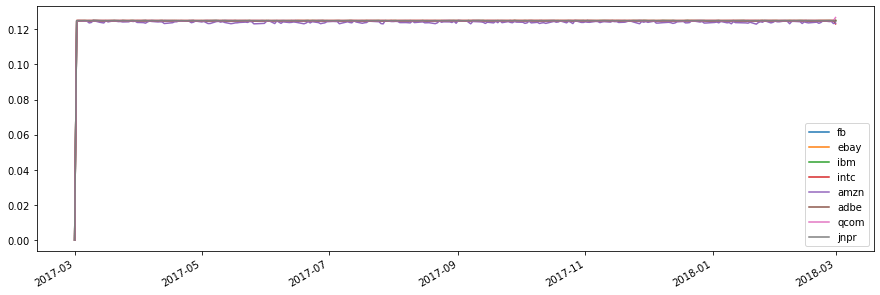

In [46]:
masterB = bt.Strategy('masterB', [bt.algos.RunDaily(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [Benchmark1,Benchmark2,Benchmark3,Benchmark4])

# create the backtest and run it
testmasterB = bt.Backtest(masterB, dataPF)
# create results so we can display and plot
resultsmasterB = bt.run(testmasterB)

resultsmasterB.plot()
resultsmasterB.display()
resultsmasterB.plot_security_weights()